## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data=pd.merge(mouse_metadata,study_results,
             how='left',
            on='Mouse ID')

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data[data.duplicated(["Mouse ID", "Timepoint"], keep="first")]
print(duplicate["Mouse ID"].unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = pd.DataFrame(data)

# print(data)

data = data[data["Mouse ID"] != 'g989']

print(data)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
# Checking the number of mice in the clean DataFrame.
len(data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data.describe()



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


tumor_mean = data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_median = data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_var = data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_std = data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_sem = data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

tumor_stats = pd.DataFrame({'Mean': tumor_mean, 
                           'Median': tumor_median,
                          'Variance': tumor_var,
                          'Standard Deviation': tumor_std,
                          'SEM': tumor_sem})

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_stats.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line

tumor_stats = data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','sem']})
tumor_stats

Tumor Volume (mm3)                                
                           mean     median        var       sem
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  0.329346
Ceftamin              52.591172  51.776157  39.290177  0.469821
Infubinol             52.884795  51.820584  43.128684  0.492236
Ketapril              55.235638  53.698743  68.553577  0.603860
Naftisol              54.331565  52.509285  66.173479  0.596466
Placebo               54.033581  52.288934  61.168083  0.581331
Propriva              52.320930  50.446266  43.852013  0.544332
Ramicane              40.216745  40.673236  23.486704  0.320955
Stelasyn              54.233149  52.431737  59.450562  0.573111
Zoniferol             53.236507  51.818479  48.533355  0.516398

## Bar and Pie Charts

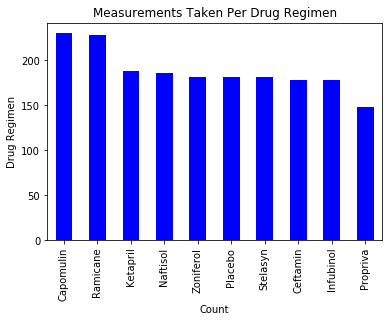

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

counts = data['Drug Regimen'].value_counts()
counts.plot(kind="bar", color="b", align="center")
plt.title("Measurements Taken Per Drug Regimen")
plt.xlabel("Count")
plt.xticks(rotation=90)
plt.ylabel("Drug Regimen")
plt.show()

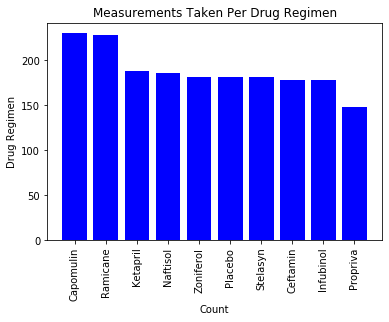

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

counts = data['Drug Regimen'].value_counts()
plt.bar(counts.index.values, counts.values, color="b", align="center")
plt.title("Measurements Taken Per Drug Regimen")
plt.xlabel("Count")
plt.xticks(rotation=90)
plt.ylabel("Drug Regimen")
plt.show()

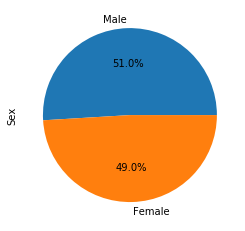

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sizes = data.Sex.value_counts()

sizes.plot(kind="pie", autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7fe52faec208>,
 [Text(-0.7433500820741924, -0.942035379102235, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.4336208812099456, -0.549520637809637, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

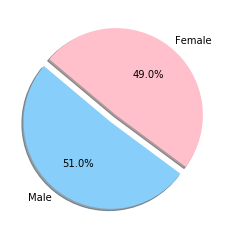

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]

male = data[data['Sex'] == 'Male']
male_counts = len(male)
female = data[data['Sex'] == 'Female']
female_counts = len(female)

sizes = [male_counts, female_counts]

colors = ["lightskyblue", "pink"]

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_life = data.groupby(["Mouse ID"], sort=False)["Timepoint"].max()
max_life = max_life.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data=max_life.merge(data,
             how='left',
            on=['Mouse ID','Timepoint'])

data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,22.050126,1
1,s185,45,Capomulin,Female,3,17,23.343598,1
2,x401,45,Capomulin,Female,16,15,28.484033,0
3,m601,45,Capomulin,Male,22,17,28.430964,1
4,g791,45,Ramicane,Male,11,16,29.128472,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril"]

# Create empty list to fill with tumor vol data (for plotting)
vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimen_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = data.loc[data["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
    
    # add subset 
    vol_list.append(tumor_vol)
    
    print(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    


    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    

1      23.343598
2      28.484033
3      28.430964
6      30.485985
10     31.023923
12     31.896238
13     32.377357
14     33.329098
16     34.455298
20     37.311846
22     36.041047
24     37.074024
28     38.846876
30     38.939633
31     38.982878
32     38.753265
34     38.125164
35     39.952347
36     40.658124
37     40.159220
38     40.728578
39     41.483008
40     41.581521
45     47.685963
180    46.539206
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
52     62.999356
65     45.000000
66     56.057749
68     55.742829
97     48.722078
110    47.784682
117    61.849023
121    68.923185
132    67.748662
133    57.918381
134    46.784535
135    59.851956
138    64.299830
1

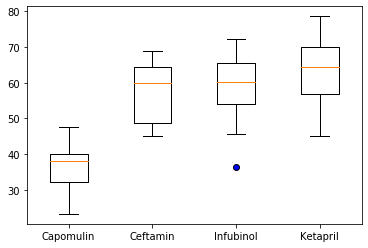

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


outliers = dict(markerfacecolor='blue')
plt.boxplot(vol_list, labels = regimen_list, flierprops=outliers)
plt.show()

## Line and Scatter Plots

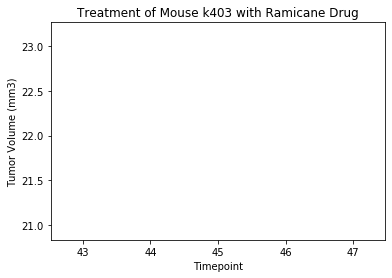

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse = data.loc[data['Mouse ID'] == 'k403']
ramicane = mouse.loc[mouse['Drug Regimen'] == 'Ramicane']

plt.plot(ramicane['Timepoint'],ramicane['Tumor Volume (mm3)'])

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Treatment of Mouse k403 with Ramicane Drug')
plt.show()

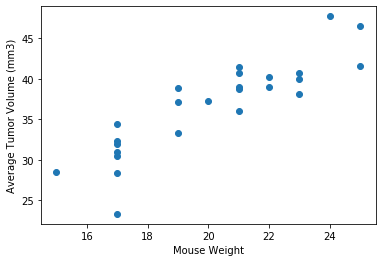

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = data.loc[data['Drug Regimen'] == 'Capomulin']
capomulin_av = capomulin.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_av['Weight (g)'],capomulin_av['Tumor Volume (mm3)'])

plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_av['Weight (g)'], capomulin_av['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
linear = st.linregress(capomulin_av['Weight (g)'], capomulin_av['Tumor Volume (mm3)'])

x_values = capomulin_av['Weight (g)']
y_values = capomulin_av['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linear(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

plt.show()

The correlation between both factors is 0.88


TypeError: 'LinregressResult' object is not callable